<a href="https://www.kaggle.com/code/vigneshwaranchokka/ecommerce-data-analytics-project?scriptVersionId=220344200" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sql-project-01/orders (1).csv
/kaggle/input/sql-project-01/products (1).csv
/kaggle/input/sql-project-01/customers (1).csv
/kaggle/input/sql-project-01/order_reviews (1).csv
/kaggle/input/sql-project-01/geolocation (1).csv
/kaggle/input/sql-project-01/order_reviews.xlsx
/kaggle/input/sql-project-01/sellers (1).csv
/kaggle/input/sql-project-01/payments (1).csv
/kaggle/input/sql-project-01/order_items (1).csv


# Introduction

This project provides detailed insights into customer behavior, sales trends, and product analytics using SQL queries and Python for data analysis and visualization. The project uses a large dataset of orders, payments, reviews, and product information to generate key performance metrics and trends.

Key objectives include:

* Customer Behavior Analysis: Segmenting customers based on order frequency and total spending, investigating the popularity of different payment methods, and analyzing customer behavior based on geographic location.
* Sales Trend Analysis: Understanding the trends in sales over time, identifying the top-selling product categories, and analyzing product reviews.
* Order Analytics: Analyzing order data, including total orders, revenue, shipping times, and product performance, to provide actionable insights for business optimization.
* Data visualizations using matplotlib and seaborn help to present the results in an easy-to-understand format, making it suitable for stakeholders to derive meaningful insights.


# Data Preparation and Table Loading

In [2]:
import pandas as pd

# Load datasets with encoding handling
customers = pd.read_csv('/kaggle/input/sql-project-01/customers (1).csv', encoding='latin1')
sellers = pd.read_csv('/kaggle/input/sql-project-01/sellers (1).csv', encoding='latin1')
order_items = pd.read_csv('/kaggle/input/sql-project-01/order_items (1).csv', encoding='latin1')
geolocation = pd.read_csv('/kaggle/input/sql-project-01/geolocation (1).csv', encoding='latin1')
payments = pd.read_csv('/kaggle/input/sql-project-01/payments (1).csv', encoding='latin1')
reviews = pd.read_csv('/kaggle/input/sql-project-01/order_reviews (1).csv', encoding='latin1')
orders = pd.read_csv('/kaggle/input/sql-project-01/orders (1).csv', encoding='latin1')
products = pd.read_csv('/kaggle/input/sql-project-01/products (1).csv', encoding='latin1')


In [3]:
import sqlite3

# Create a connection to SQLite database
conn = sqlite3.connect('ecommerce.db')

# Store datasets in SQLite tables
customers.to_sql('customers', conn, if_exists='replace', index=False)
sellers.to_sql('sellers', conn, if_exists='replace', index=False)
order_items.to_sql('order_items', conn, if_exists='replace', index=False)
geolocation.to_sql('geolocation', conn, if_exists='replace', index=False)
payments.to_sql('payments', conn, if_exists='replace', index=False)
reviews.to_sql('reviews', conn, if_exists='replace', index=False)
orders.to_sql('orders', conn, if_exists='replace', index=False)
products.to_sql('products', conn, if_exists='replace', index=False)

print("Tables loaded successfully!")


Tables loaded successfully!


In [4]:
query = """
SELECT name FROM sqlite_master WHERE type='table';
"""
pd.read_sql(query, conn)

,name
0,customers
1,sellers
2,order_items
3,geolocation
4,payments
5,reviews
6,orders
7,products


In [5]:
import pandas as pd


# Get all table names
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)

# Create a list to store the results
table_info_list = []

# Loop through each table and get its columns and types
for table in tables['name']:
    query = f"PRAGMA table_info({table});"
    columns = pd.read_sql(query, conn)
    for _, row in columns.iterrows():
        table_info_list.append({
            'table_name': table,
            'column_name': row['name'],
            'column_type': row['type']
        })

# Convert the results to a DataFrame
table_info_df = pd.DataFrame(table_info_list)

# Show the DataFrame
print(table_info_df)


     table_name                    column_name column_type
0     customers                    customer_id        TEXT
1     customers             customer_unique_id        TEXT
2     customers       customer_zip_code_prefix     INTEGER
3     customers                  customer_city        TEXT
4     customers                 customer_state        TEXT
5       sellers                      seller_id        TEXT
6       sellers         seller_zip_code_prefix     INTEGER
7       sellers                    seller_city        TEXT
8       sellers                   seller_state        TEXT
9   order_items                       order_id        TEXT
10  order_items                  order_item_id     INTEGER
11  order_items                     product_id        TEXT
12  order_items                      seller_id        TEXT
13  order_items            shipping_limit_date        TEXT
14  order_items                          price        REAL
15  order_items                  freight_value        RE

# Order Analytics: Insights

In [6]:
import pandas as pd

# List of queries for SQL Analytics project
queries = [
    """
    -- 1. Get total number of orders for each customer
    SELECT customer_id, COUNT(order_id) AS total_orders
    FROM orders
    GROUP BY customer_id
    ORDER BY total_orders DESC;
    """,
    
    """
    -- 2. Get total sales by payment type
    SELECT payment_type, SUM(payment_value) AS total_sales
    FROM payments
    GROUP BY payment_type
    ORDER BY total_sales DESC;
    """,
    
    """
    -- 3. Get the average rating for each product
    SELECT oi.product_id, AVG(r.review_score) AS avg_rating
    FROM reviews r
    JOIN order_items oi ON r.order_id = oi.order_id
    GROUP BY oi.product_id
    ORDER BY avg_rating DESC;
    """,
    
    """
    -- 4. Get the total revenue for each seller (adjusted for missing quantity column)
    SELECT seller_id, SUM(price) AS total_revenue
    FROM order_items
    GROUP BY seller_id
    ORDER BY total_revenue DESC;
    """,
    
    """
    -- 5. Get the products with the most reviews (Top 10)
    SELECT oi.product_id, COUNT(r.review_id) AS total_reviews
    FROM reviews r
    JOIN order_items oi ON r.order_id = oi.order_id
    GROUP BY oi.product_id
    ORDER BY total_reviews DESC
    LIMIT 10;
    """,
    
    """
    -- 6. Get the total number of products in each product category
    SELECT "product category", COUNT(product_id) AS total_products
    FROM products
    GROUP BY "product category"
    ORDER BY total_products DESC;
    """,
    
    """
    -- 7. Get the most frequent order status
    SELECT order_status, COUNT(order_id) AS status_count
    FROM orders
    GROUP BY order_status
    ORDER BY status_count DESC;
    """,
    
    """
    -- 8. Get the average shipping time by seller
    SELECT oi.seller_id, AVG(julianday(o.order_delivered_customer_date) - julianday(o.order_purchase_timestamp)) AS avg_shipping_time
    FROM orders o
    JOIN order_items oi ON o.order_id = oi.order_id
    WHERE o.order_delivered_customer_date IS NOT NULL
    GROUP BY oi.seller_id
    ORDER BY avg_shipping_time;
    """,
    
    """
    -- 9. Find the top 5 cities with the highest number of sellers
    SELECT seller_city, COUNT(seller_id) AS num_sellers
    FROM sellers
    GROUP BY seller_city
    ORDER BY num_sellers DESC
    LIMIT 5;
    """,
    
    """
    -- 10. Get the top 5 cities with the highest number of orders
    SELECT customer_city, COUNT(order_id) AS num_orders
    FROM orders
    JOIN customers ON orders.customer_id = customers.customer_id
    GROUP BY customer_city
    ORDER BY num_orders DESC
    LIMIT 5;
    """,
    
    """
    -- 11. Get total revenue for each product
    SELECT oi.product_id, SUM(oi.price) AS total_revenue
    FROM order_items oi
    GROUP BY oi.product_id
    ORDER BY total_revenue DESC;
    """,
    
    """
    -- 12. Find the average number of items per order
    SELECT AVG(order_items_count) AS avg_items_per_order
    FROM (
      SELECT order_id, COUNT(order_item_id) AS order_items_count
      FROM order_items
      GROUP BY order_id
    );
    """,
    
    """
    -- 13. Find the most common shipping limit dates
    SELECT shipping_limit_date, COUNT(order_id) AS total_orders
    FROM order_items
    GROUP BY shipping_limit_date
    ORDER BY total_orders DESC
    LIMIT 10;
    """,
    
    """
    -- 14. Get the total number of orders per customer based on customer state
    SELECT customer_state, COUNT(order_id) AS total_orders
    FROM orders
    JOIN customers ON orders.customer_id = customers.customer_id
    GROUP BY customer_state
    ORDER BY total_orders DESC;
    """,
    
    """
    -- 15. Get the top 5 cities with the highest average payment value
    SELECT customer_city, AVG(payment_value) AS avg_payment_value
    FROM payments
    JOIN orders ON payments.order_id = orders.order_id
    JOIN customers ON orders.customer_id = customers.customer_id
    GROUP BY customer_city
    ORDER BY avg_payment_value DESC
    LIMIT 5;
    """,
    
    """
    -- 16. Get the number of orders during festivals (assuming festival is based on event dates or external data)
    SELECT COUNT(order_id) AS total_orders
    FROM orders
    WHERE strftime('%m', order_purchase_timestamp) IN ('12', '01', '05') -- example months for festivals
    """,
    
    """
    -- 17. Get the total revenue generated by each city
    SELECT customer_city, SUM(payment_value) AS total_revenue
    FROM payments
    JOIN orders ON payments.order_id = orders.order_id
    JOIN customers ON orders.customer_id = customers.customer_id
    GROUP BY customer_city
    ORDER BY total_revenue DESC;
    """,
    
    """
    -- 18. Get the average order delivery time by city
    SELECT customer_city, AVG(julianday(order_delivered_customer_date) - julianday(order_purchase_timestamp)) AS avg_delivery_time
    FROM orders
    JOIN customers ON orders.customer_id = customers.customer_id
    WHERE order_delivered_customer_date IS NOT NULL
    GROUP BY customer_city
    ORDER BY avg_delivery_time;
    """,
    
    """
    -- 19. Find the top 5 products with the highest average price
    SELECT product_id, AVG(price) AS avg_price
    FROM order_items
    GROUP BY product_id
    ORDER BY avg_price DESC
    LIMIT 5;
    """,
    
    """
    -- 20. Get the number of products sold by each seller
    SELECT seller_id, COUNT(order_item_id) AS products_sold
    FROM order_items
    GROUP BY seller_id
    ORDER BY products_sold DESC;
    """
]

# Execute each query and display the results
for i, query in enumerate(queries):
    print(f"\n--- Running Query {i+1} ---")
    print(f"Query {i+1} Description: {queries[i].strip().splitlines()[0]}\n")
    
    # Fetch results from the query
    result = pd.read_sql(query, conn)
    
    # Display the output for each query
    display(result)
    print("\n--- End of Query ---\n")



--- Running Query 1 ---
Query 1 Description: -- 1. Get total number of orders for each customer



,customer_id,total_orders
0,ffffe8b65bbe3087b653a978c870db99,1
1,ffffa3172527f765de70084a7e53aae8,1
2,ffff42319e9b2d713724ae527742af25,1
3,fffeda5b6d849fbd39689bb92087f431,1
4,fffecc9f79fd8c764f843e9951b11341,1
...,...,...
99436,000379cdec625522490c315e70c7a9fb,1
99437,0002414f95344307404f0ace7a26f1d5,1
99438,0001fd6190edaaf884bcaf3d49edf079,1
99439,000161a058600d5901f007fab4c27140,1



--- End of Query ---


--- Running Query 2 ---
Query 2 Description: -- 2. Get total sales by payment type



,payment_type,total_sales
0,credit_card,1.254208e+07
1,UPI,2.869361e+06
2,voucher,3.794369e+05
3,debit_card,2.179898e+05
4,not_defined,0.000000e+00



--- End of Query ---


--- Running Query 3 ---
Query 3 Description: -- 3. Get the average rating for each product



,product_id,avg_rating
0,fffdb2d0ec8d6a61f0a0a0db3f25b441,5.0
1,fff9553ac224cec9d15d49f5a263411f,5.0
2,ffeb228c521d5464d1f71444da96c446,5.0
3,ffe9468f4d890db80b7231e86931ff37,5.0
4,ffe8083298f95571b4a66bfbc1c05524,5.0
...,...,...
32784,0043d1a25ef08fb6f41b8fa6f91742ab,1.0
32785,0043c62d00db47eff6a6bc4cf6bfaeda,1.0
32786,002d4ea7c04739c130bb74d7e7cd1694,1.0
32787,0011c512eb256aa0dbbb544d8dffcf6e,1.0



--- End of Query ---


--- Running Query 4 ---
Query 4 Description: -- 4. Get the total revenue for each seller (adjusted for missing quantity column)



,seller_id,total_revenue
0,4869f7a5dfa277a7dca6462dcf3b52b2,229472.63
1,53243585a1d6dc2643021fd1853d8905,222776.05
2,4a3ca9315b744ce9f8e9374361493884,200472.92
3,fa1c13f2614d7b5c4749cbc52fecda94,194042.03
4,7c67e1448b00f6e969d365cea6b010ab,187923.89
...,...,...
3090,34aefe746cd81b7f3b23253ea28bef39,8.00
3091,702835e4b785b67a084280efca355756,7.60
3092,1fa2d3def6adfa70e58c276bb64fe5bb,6.90
3093,77128dec4bec4878c37ab7d6169d6f26,6.50



--- End of Query ---


--- Running Query 5 ---
Query 5 Description: -- 5. Get the products with the most reviews (Top 10)



,product_id,total_reviews
0,aca2eb7d00ea1a7b8ebd4e68314663af,524
1,422879e10f46682990de24d770e7f83d,486
2,99a4788cb24856965c36a24e339b6058,482
3,389d119b48cf3043d311335e499d9c6b,391
4,368c6c730842d78016ad823897a372db,388
5,53759a2ecddad2bb87a079a1f1519f73,373
6,d1c427060a0f73f6b889a5c7c61f2ac4,340
7,53b36df67ebb7c41585e8d54d6772e08,320
8,154e7e31ebfa092203795c972e5804a6,292
9,3dd2a17168ec895c781a9191c1e95ad7,272



--- End of Query ---


--- Running Query 6 ---
Query 6 Description: -- 6. Get the total number of products in each product category



,product category,total_products
0,bed table bath,3029
1,sport leisure,2867
2,Furniture Decoration,2657
3,HEALTH BEAUTY,2444
4,housewares,2335
...,...,...
69,House Comfort 2,5
70,Fashion Children's Clothing,5
71,PC Gamer,3
72,insurance and services,2



--- End of Query ---


--- Running Query 7 ---
Query 7 Description: -- 7. Get the most frequent order status



,order_status,status_count
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2



--- End of Query ---


--- Running Query 8 ---
Query 8 Description: -- 8. Get the average shipping time by seller



,seller_id,avg_shipping_time
0,139157dd4daa45c25b0807ffff348363,1.214178
1,5e063e85d44b0f5c3e6ec3131103a57e,1.288333
2,6561d6bf844e464b4019442692b40e02,1.434201
3,702835e4b785b67a084280efca355756,1.804039
4,674207551483fec113276b67b0d871ff,1.869537
...,...,...
2965,8629a7efec1aab257e58cda559f03ba7,59.226678
2966,4fb41dff7c50136976d1a5cf004a42e2,66.754657
2967,586a871d4f1221763fddb6ceefdeb95e,68.621146
2968,8e670472e453ba34a379331513d6aab1,86.001169



--- End of Query ---


--- Running Query 9 ---
Query 9 Description: -- 9. Find the top 5 cities with the highest number of sellers



,seller_city,num_sellers
0,sao paulo,694
1,curitiba,127
2,rio de janeiro,96
3,belo horizonte,68
4,ribeirao preto,52



--- End of Query ---


--- Running Query 10 ---
Query 10 Description: -- 10. Get the top 5 cities with the highest number of orders



,customer_city,num_orders
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521



--- End of Query ---


--- Running Query 11 ---
Query 11 Description: -- 11. Get total revenue for each product



,product_id,total_revenue
0,bb50f2e236e5eea0100680137654686c,63885.00
1,6cdd53843498f92890544667809f1595,54730.20
2,d6160fb7873f184099d9bc95e30376af,48899.34
3,d1c427060a0f73f6b889a5c7c61f2ac4,47214.51
4,99a4788cb24856965c36a24e339b6058,43025.56
...,...,...
32946,2e8316b31db34314f393806fd7b6e185,2.99
32947,680cc8535be7cc69544238c1d6a83fe8,2.90
32948,8a3254bee785a526d548a81a9bc3c9be,2.55
32949,310dc32058903b6416c71faff132df9e,2.29



--- End of Query ---


--- Running Query 12 ---
Query 12 Description: -- 12. Find the average number of items per order



,avg_items_per_order
0,1.141731



--- End of Query ---


--- Running Query 13 ---
Query 13 Description: -- 13. Find the most common shipping limit dates



,shipping_limit_date,total_orders
0,2018-03-01 02:50:48,21
1,2017-07-21 18:25:23,21
2,2017-08-30 14:30:23,20
3,2017-12-21 02:30:41,15
4,2017-11-30 10:30:51,15
5,2017-02-03 21:44:49,15
6,2018-02-28 11:48:12,14
7,2018-06-13 17:30:35,13
8,2018-04-25 22:11:43,13
9,2018-04-19 02:30:52,13



--- End of Query ---


--- Running Query 14 ---
Query 14 Description: -- 14. Get the total number of orders per customer based on customer state



,customer_state,total_orders
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020



--- End of Query ---


--- Running Query 15 ---
Query 15 Description: -- 15. Get the top 5 cities with the highest average payment value



,customer_city,avg_payment_value
0,pianco,2324.99
1,nova esperanca do piria,2252.66
2,engenheiro navarro,2106.55
3,mariental,1867.85
4,loreto,1643.64



--- End of Query ---


--- Running Query 16 ---
Query 16 Description: -- 16. Get the number of orders during festivals (assuming festival is based on event dates or external data)



,total_orders
0,24316



--- End of Query ---


--- Running Query 17 ---
Query 17 Description: -- 17. Get the total revenue generated by each city



,customer_city,total_revenue
0,sao paulo,2203373.09
1,rio de janeiro,1161927.36
2,belo horizonte,421765.12
3,brasilia,354216.78
4,curitiba,247392.48
...,...,...
4114,santo antonio do rio abaixo,24.23
4115,tamboara,24.09
4116,jenipapo de minas,22.58
4117,polo petroquimico de triunfo,20.70



--- End of Query ---


--- Running Query 18 ---
Query 18 Description: -- 18. Get the average order delivery time by city



,customer_city,avg_delivery_time
0,iomere,2.968611
1,siriji,3.155093
2,acucena,3.728102
3,pedra bela,3.829248
4,contenda,3.918461
...,...,...
4080,marcelino vieira,78.182396
4081,arace,86.403944
4082,adhemar de barros,97.468507
4083,capinzal do norte,109.075029



--- End of Query ---


--- Running Query 19 ---
Query 19 Description: -- 19. Find the top 5 products with the highest average price



,product_id,avg_price
0,489ae2aa008f021502940f251d4cce7f,6735.0
1,69c590f7ffc7bf8db97190b6cb6ed62e,6729.0
2,1bdf5e6731585cf01aa8169c7028d6ad,6499.0
3,a6492cc69376c469ab6f61d8f44de961,4799.0
4,c3ed642d592594bb648ff4a04cee2747,4690.0



--- End of Query ---


--- Running Query 20 ---
Query 20 Description: -- 20. Get the number of products sold by each seller



,seller_id,products_sold
0,6560211a19b47992c3666cc44a7e94c0,2033
1,4a3ca9315b744ce9f8e9374361493884,1987
2,1f50f920176fa81dab994f9023523100,1931
3,cc419e0650a3c5ba77189a1882b7556a,1775
4,da8622b14eb17ae2831f4ac5b9dab84a,1551
...,...,...
3090,04ee0ec01589969663ba5967c0e0bdc0,1
3091,00d8b143d12632bad99c0ad66ad52825,1
3092,00ab3eff1b5192e5f1a63bcecfee11c8,1
3093,003554e2dce176b5555353e4f3555ac8,1



--- End of Query ---



In [7]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


# Customer Behavior Analysis


--- Running Query 1 ---
Query 1 Description: -- Segment customers based on order frequency and total spending



,customer_id,order_count,total_spending
0,1617b1357756262bfa56ab541c47bc16,1,13440.00
1,ec5b2ba62e574342386871631fafd3fc,1,7160.00
2,c6e2731c5b391845f6800c97401a43a9,1,6735.00
3,f48d464a0baaea338cb25f816991ab1f,1,6729.00
4,3fd6777bbce08a352fddd04e4a7cc8f6,1,6499.00
...,...,...,...
938,30aa6e2e5bce6448ef6c3a0bfca52806,1,1004.99
939,1199615452acb7d59d0155b46a60a190,1,1004.99
940,0334f4a8d10b77fa20ecb172b9f3a50d,1,1004.99
941,02385ca219b24812b4c7c65818e3b06a,1,1004.99


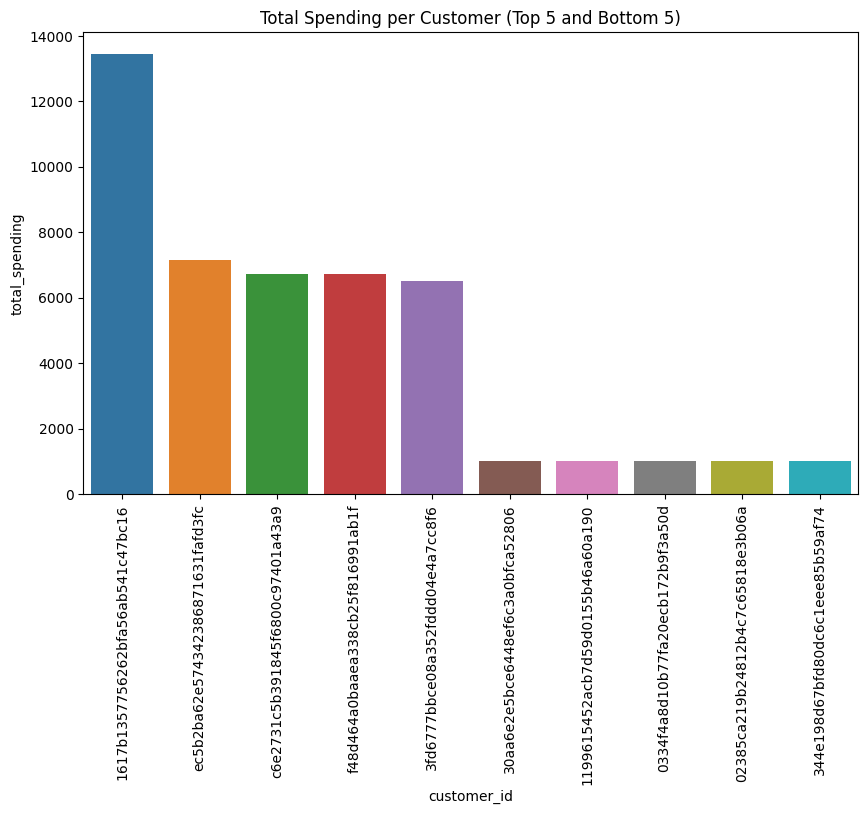


--- End of Query ---


--- Running Query 2 ---
Query 2 Description: -- Find the most purchased product categories by customers



,product category,total_orders,total_revenue
0,bed table bath,9417,1036988.68
1,HEALTH BEAUTY,8836,1258681.34
2,sport leisure,7720,988048.97
3,computer accessories,6689,911954.32
4,Furniture Decoration,6449,729762.49
...,...,...,...
69,La Cuisine,13,2054.99
70,cds music dvds,12,730.00
71,PC Gamer,8,1545.95
72,Fashion Children's Clothing,8,569.85


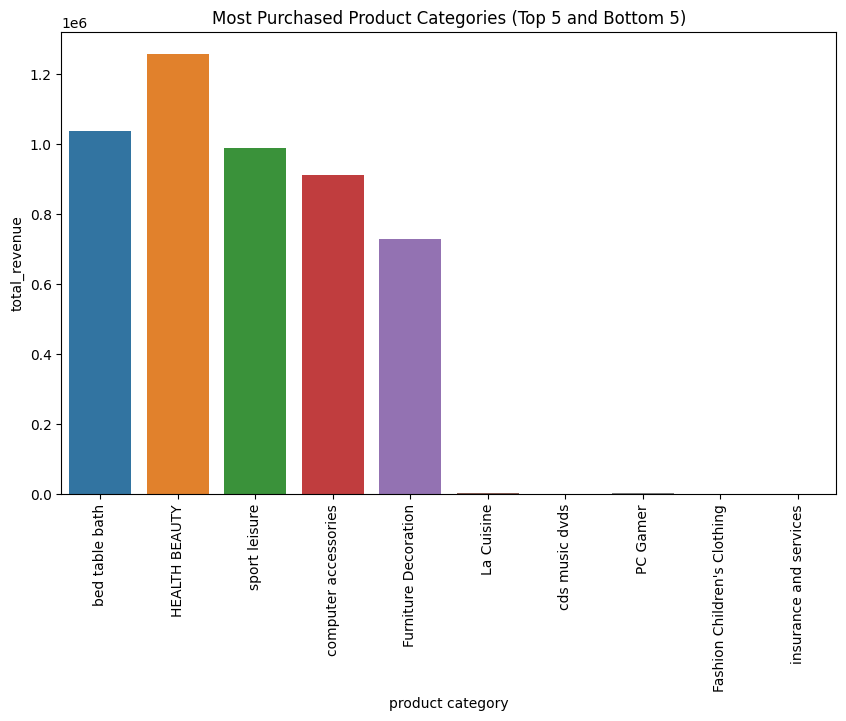


--- End of Query ---


--- Running Query 3 ---
Query 3 Description: -- Analyze average review scores for each product category



,product category,average_review_score
0,cds music dvds,4.642857
1,Fashion Children's Clothing,4.500000
2,General Interest Books,4.446266
3,Construction Tools Tools,4.444444
4,flowers,4.419355
...,...,...
69,Furniture office,3.493183
70,PC Gamer,3.333333
71,Kitchen portable and food coach,3.266667
72,Hygiene diapers,3.256410


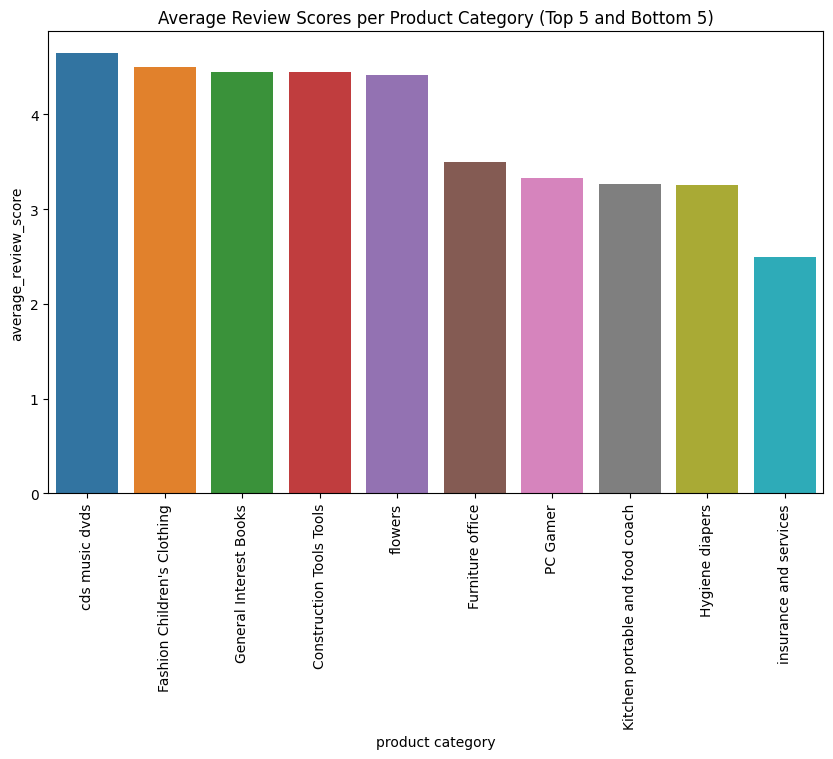


--- End of Query ---


--- Running Query 4 ---
Query 4 Description: -- Analyze customer behavior based on their location



,customer_state,total_orders,total_spending
0,SP,41375,5.202955e+06
1,RJ,12762,1.824093e+06
2,MG,11544,1.585308e+06
3,RS,5432,7.503040e+05
4,PR,4998,6.830838e+05
5,SC,3612,5.205533e+05
6,BA,3358,5.113500e+05
7,DF,2125,3.026039e+05
8,GO,2007,2.945919e+05
9,ES,2025,2.750373e+05


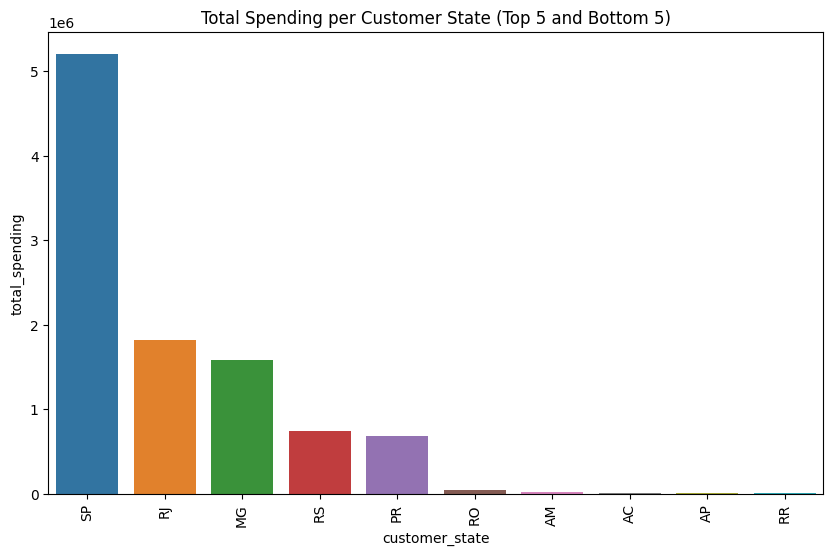


--- End of Query ---


--- Running Query 5 ---
Query 5 Description: -- Investigate the popularity of different payment methods



,payment_type,order_count,total_value
0,credit_card,76505,1.254208e+07
1,UPI,19784,2.869361e+06
2,voucher,3866,3.794369e+05
3,debit_card,1528,2.179898e+05
4,not_defined,3,0.000000e+00


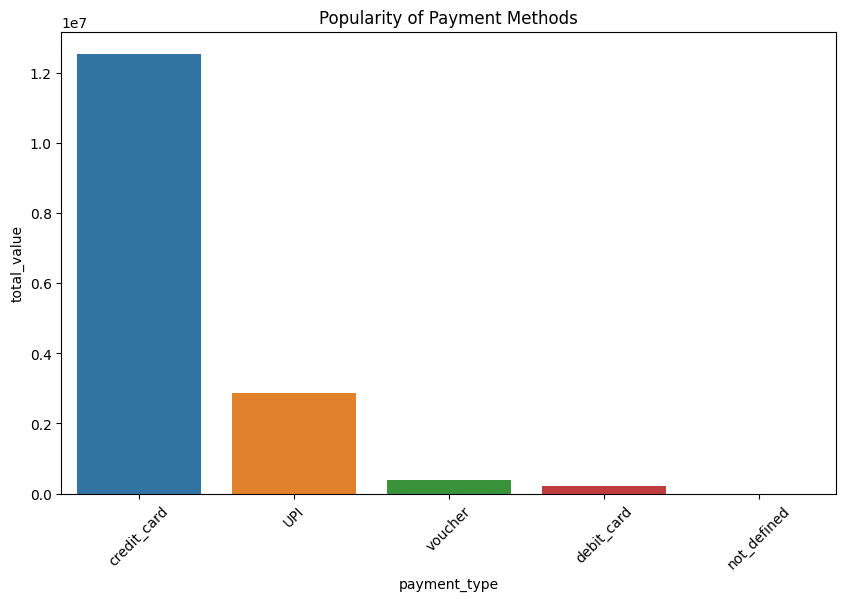


--- End of Query ---



In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of queries for SQL Analytics project
queries = [
    """
    -- Segment customers based on order frequency and total spending
    SELECT customers.customer_id, 
       COUNT(DISTINCT orders.order_id) AS order_count,
       SUM(order_items.price) AS total_spending
    FROM customers
    JOIN orders ON customers.customer_id = orders.customer_id
    JOIN order_items ON orders.order_id = order_items.order_id
    GROUP BY customers.customer_id
    HAVING total_spending > 1000
    ORDER BY total_spending DESC;
    """,
    
    """
    -- Find the most purchased product categories by customers
    SELECT "product category", 
       COUNT(DISTINCT order_items.order_id) AS total_orders,
       SUM(order_items.price) AS total_revenue
    FROM order_items
    JOIN products ON order_items.product_id = products.product_id
    GROUP BY "product category"
    ORDER BY total_orders DESC;
    """,
    
    """
    -- Analyze average review scores for each product category
    SELECT products."product category",
       AVG(reviews.review_score) AS average_review_score
    FROM reviews
    JOIN order_items ON reviews.order_id = order_items.order_id
    JOIN products ON order_items.product_id = products.product_id
    GROUP BY products."product category"
    ORDER BY average_review_score DESC;
    """,
    
    """
    -- Analyze customer behavior based on their location
    SELECT customer_state, 
           COUNT(DISTINCT orders.order_id) AS total_orders,
           SUM(order_items.price) AS total_spending
    FROM customers
    JOIN orders ON customers.customer_id = orders.customer_id
    JOIN order_items ON orders.order_id = order_items.order_id
    GROUP BY customer_state
    ORDER BY total_spending DESC;
    """,
    
    """
    -- Investigate the popularity of different payment methods
    SELECT payment_type, 
           COUNT(DISTINCT orders.order_id) AS order_count,
           SUM(payments.payment_value) AS total_value
    FROM payments
    JOIN orders ON payments.order_id = orders.order_id
    GROUP BY payment_type
    ORDER BY total_value DESC;
    """
]

# Execute each query and display the results with visualization
for i, query in enumerate(queries):
    print(f"\n--- Running Query {i+1} ---")
    print(f"Query {i+1} Description: {queries[i].strip().splitlines()[0]}\n")
    
    # Fetch results from the query
    result = pd.read_sql(query, conn)
    
    # Display the output for each query
    display(result)
    
    # Limit to top 5 and bottom 5
    if 'order_count' in result.columns and 'total_spending' in result.columns:
        result_top_bottom = pd.concat([result.head(5), result.tail(5)])
        
        # Bar plot for total spending per customer or state
        plt.figure(figsize=(10, 6))
        sns.barplot(x='customer_id', y='total_spending', data=result_top_bottom)
        plt.xticks(rotation=90)
        plt.title('Total Spending per Customer (Top 5 and Bottom 5)')
        plt.show()
    
    elif 'total_orders' in result.columns and 'total_revenue' in result.columns:
        result_top_bottom = pd.concat([result.head(5), result.tail(5)])
        
        # Bar plot for the most purchased product categories
        plt.figure(figsize=(10, 6))
        sns.barplot(x="product category", y="total_revenue", data=result_top_bottom)
        plt.xticks(rotation=90)
        plt.title('Most Purchased Product Categories (Top 5 and Bottom 5)')
        plt.show()
    
    elif 'average_review_score' in result.columns:
        result_top_bottom = pd.concat([result.head(5), result.tail(5)])
        
        # Bar plot for average review score per product category
        plt.figure(figsize=(10, 6))
        sns.barplot(x="product category", y="average_review_score", data=result_top_bottom)
        plt.xticks(rotation=90)
        plt.title('Average Review Scores per Product Category (Top 5 and Bottom 5)')
        plt.show()
    
    elif 'customer_state' in result.columns and 'total_spending' in result.columns:
        result_top_bottom = pd.concat([result.head(5), result.tail(5)])
        
        # Bar plot for total spending per customer state
        plt.figure(figsize=(10, 6))
        sns.barplot(x='customer_state', y='total_spending', data=result_top_bottom)
        plt.xticks(rotation=90)
        plt.title('Total Spending per Customer State (Top 5 and Bottom 5)')
        plt.show()
    
    elif 'payment_type' in result.columns and 'total_value' in result.columns:
        # Bar plot for popularity of different payment methods (no filtering for top/bottom)
        plt.figure(figsize=(10, 6))
        sns.barplot(x='payment_type', y='total_value', data=result)
        plt.xticks(rotation=45)
        plt.title('Popularity of Payment Methods')
        plt.show()

    print("\n--- End of Query ---\n")


# Sales Trend Analysis


--- Running Query 1 ---
Query 1 Description: SELECT strftime('%Y-%m', orders.order_purchase_timestamp) AS month,



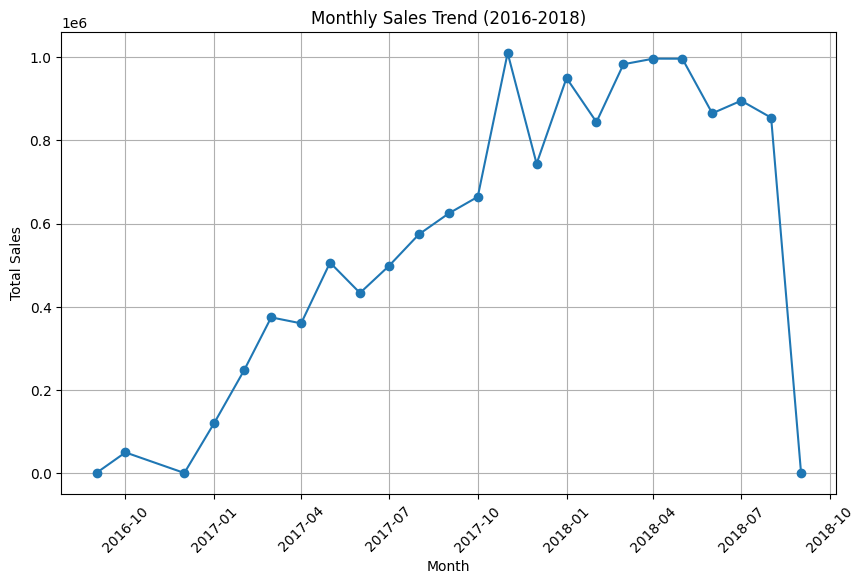

,month,total_sales,total_orders
0,2016-09-01,267.36,3
1,2016-10-01,49507.66,308
2,2016-12-01,10.90,1
3,2017-01-01,120312.87,789
4,2017-02-01,247303.02,1733
5,2017-03-01,374344.30,2641
6,2017-04-01,359927.23,2391
7,2017-05-01,506071.14,3660
8,2017-06-01,433038.60,3217
9,2017-07-01,498031.48,3969



--- End of Query ---


--- Running Query 2 ---
Query 2 Description: SELECT products."product category", 



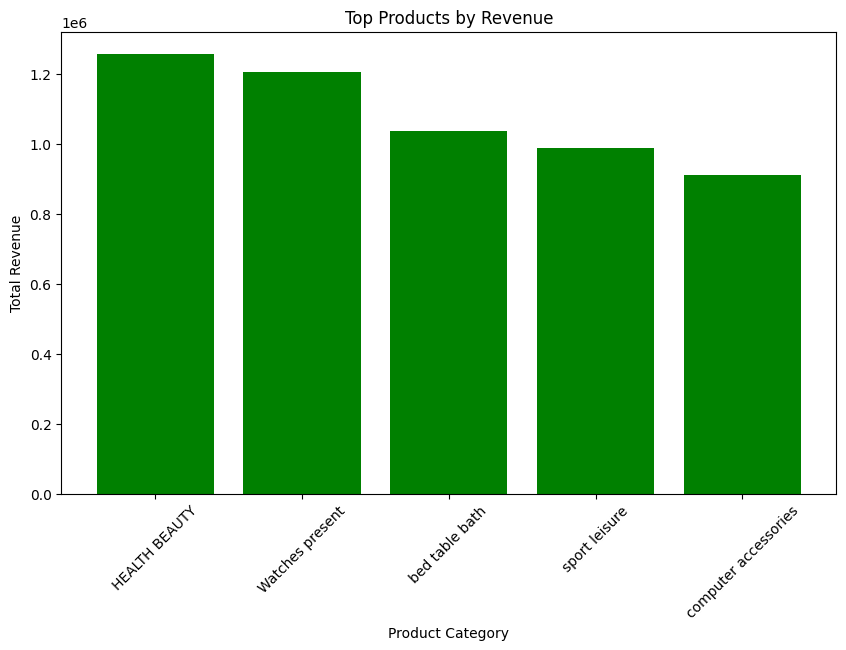

,product category,total_orders,total_revenue
0,HEALTH BEAUTY,8836,1258681.34
1,Watches present,5624,1205005.68
2,bed table bath,9417,1036988.68
3,sport leisure,7720,988048.97
4,computer accessories,6689,911954.32



--- End of Query ---


--- Running Query 3 ---
Query 3 Description: SELECT products."product category",



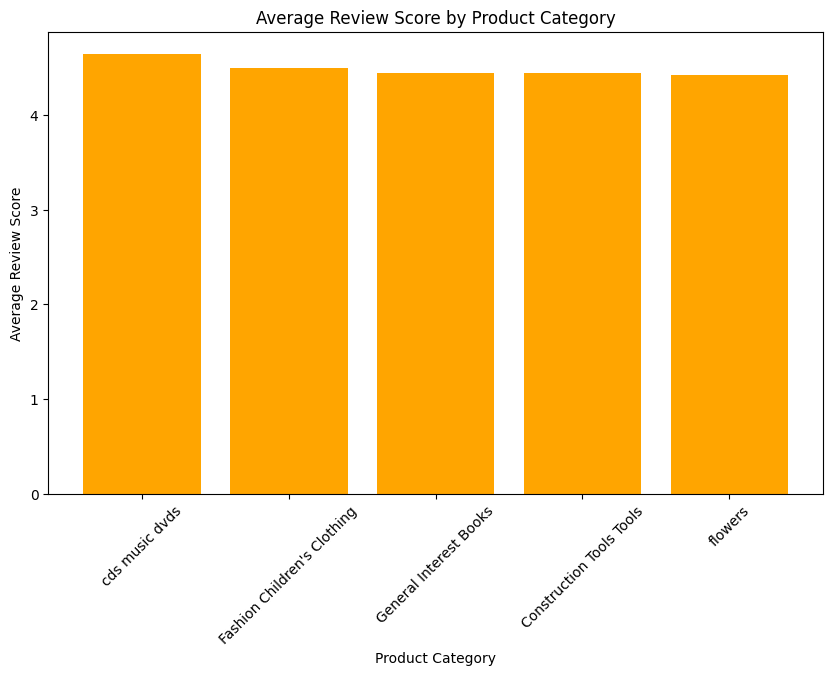

,product category,average_review_score
0,cds music dvds,4.642857
1,Fashion Children's Clothing,4.500000
2,General Interest Books,4.446266
3,Construction Tools Tools,4.444444
4,flowers,4.419355



--- End of Query ---



In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3  # Assuming SQLite database connection

# Assuming conn is your database connection
conn = sqlite3.connect('ecommerce.db')

# List of queries for SQL Analytics project
queries = [
    """
    SELECT strftime('%Y-%m', orders.order_purchase_timestamp) AS month,
           SUM(order_items.price) AS total_sales,
           COUNT(DISTINCT orders.order_id) AS total_orders
    FROM orders
    JOIN order_items ON orders.order_id = order_items.order_id
    WHERE strftime('%Y', orders.order_purchase_timestamp) BETWEEN '2016' AND '2018'
    GROUP BY strftime('%Y-%m', orders.order_purchase_timestamp)
    ORDER BY month;
    """,

    """
    SELECT products."product category", 
           COUNT(DISTINCT order_items.order_id) AS total_orders,
           SUM(order_items.price) AS total_revenue
    FROM order_items
    JOIN products ON order_items.product_id = products.product_id
    GROUP BY products."product category"
    ORDER BY total_revenue DESC
    LIMIT 5;
    """,
    
    """
    SELECT products."product category",
           AVG(reviews.review_score) AS average_review_score
    FROM reviews
    JOIN order_items ON reviews.order_id = order_items.order_id
    JOIN products ON order_items.product_id = products.product_id
    GROUP BY products."product category"
    ORDER BY average_review_score DESC
    LIMIT 5;
    """
]

# Execute each query and display the results
for i, query in enumerate(queries):
    print(f"\n--- Running Query {i+1} ---")
    print(f"Query {i+1} Description: {queries[i].strip().splitlines()[0]}\n")
    
    # Fetch results from the query
    result = pd.read_sql(query, conn)
    
    # Visualization for the first query (monthly sales)
    if i == 0:
        result['month'] = pd.to_datetime(result['month'])
        plt.figure(figsize=(10, 6))
        plt.plot(result['month'], result['total_sales'], marker='o')
        plt.title('Monthly Sales Trend (2016-2018)')
        plt.xlabel('Month')
        plt.ylabel('Total Sales')
        plt.grid(True)
        plt.xticks(rotation=45)
        plt.show()
    

    # Visualization for the third query (top products by revenue)
    if i == 1:
        plt.figure(figsize=(10, 6))
        plt.bar(result['product category'], result['total_revenue'], color='green')
        plt.title('Top Products by Revenue')
        plt.xlabel('Product Category')
        plt.ylabel('Total Revenue')
        plt.xticks(rotation=45)
        plt.show()
    
    # Visualization for the fourth query (average review score by product category)
    if i == 2:
        plt.figure(figsize=(10, 6))
        plt.bar(result['product category'], result['average_review_score'], color='orange')
        plt.title('Average Review Score by Product Category')
        plt.xlabel('Product Category')
        plt.ylabel('Average Review Score')
        plt.xticks(rotation=45)
        plt.show()

    # Display the output for each query
    display(result)
    print("\n--- End of Query ---\n")


# Conclusion
The analysis performed in this project provides valuable insights into business operations, consumer behavior, and product performance. By leveraging data analytics, we are able to understand customer preferences, sales patterns, and operational efficiencies. This can guide decision-making and help improve strategies in marketing, sales, and product development.